# Load Data

In [3]:
import nibabel as nib
data1 = nib.load('Data/sub-01_task-theoryofmindwithmanualresponse_run-01_bold.nii.gz')
data1

# Read Time Series

In [4]:
import readBoldData as rbd
y_i = rbd.voxelTimeSeries(data1,20,20,20)
y_i

array([[1014.],
       [1024.],
       [1058.],
       [1029.],
       [1038.],
       [1039.],
       [1013.],
       [1033.],
       [1031.],
       [1044.],
       [1041.],
       [1054.],
       [1054.],
       [1031.],
       [1038.],
       [1048.],
       [1026.],
       [1036.],
       [1038.],
       [1017.],
       [1039.],
       [1044.],
       [1029.],
       [1041.],
       [1047.],
       [1043.],
       [1021.],
       [1057.],
       [1036.],
       [1024.],
       [1040.],
       [1054.],
       [1029.],
       [1042.],
       [1040.],
       [1023.],
       [1032.],
       [1042.],
       [1040.],
       [1036.],
       [1017.],
       [1049.],
       [1027.],
       [1032.],
       [1021.],
       [1020.],
       [1038.],
       [1029.],
       [1032.],
       [1022.],
       [1023.],
       [1025.],
       [1011.],
       [1027.],
       [1033.],
       [1004.],
       [1026.],
       [1019.],
       [1032.],
       [1049.],
       [1021.],
       [1031.],
       [

# Create mask

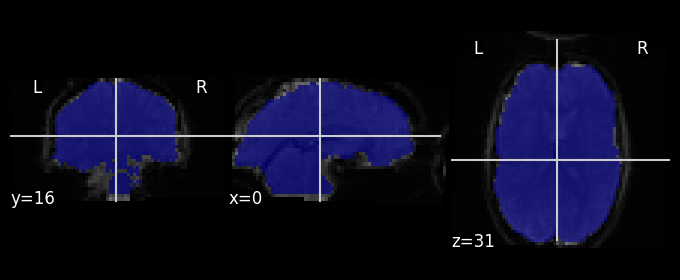

In [5]:
from nilearn.masking import compute_epi_mask
from nilearn.plotting import plot_roi
from nilearn.image.image import mean_img
mean_haxby = mean_img(data1)
mask_img = compute_epi_mask(data1, connected=False)
plot_roi(mask_img,mean_haxby)

In [6]:
from nilearn.masking import apply_mask
masked_data = apply_mask(data1, mask_img)
masked_data.shape

(179, 40078)

# Create Design Matrix

In [27]:
import pandas as pd

events1 = 'Data/sub-01_task-theoryofmindwithmanualresponse_run-01_events.tsv'

df_events1 = pd.read_csv(events1,sep='\t')

stim_ev1 = df_events1[df_events1['trial_type'].notnull()]
df_ev1 = df_events1[df_events1['trial_type'].isnull()].reset_index(drop=True)
for r in range(len(stim_ev1)):
  df_ev1.at[int(stim_ev1.iloc[r,0]/2),'duration'] = stim_ev1.iloc[r,:]['duration']
  df_ev1.at[int(stim_ev1.iloc[r,0]/2),'trial_type'] = stim_ev1.iloc[r,:]['trial_type']

df_ev1

,onset,duration,trial_type,ConditionCode,CorrectAnswerCode,KeyPressed,ResponseTime,StoryCode
0,0.0,2.0,NaN,0.0,0.0,46.0,1.980,0.0
1,2.0,2.0,NaN,0.0,0.0,46.0,1.992,0.0
2,4.0,2.0,NaN,0.0,0.0,46.0,1.994,0.0
3,6.0,2.0,NaN,0.0,0.0,46.0,1.994,0.0
4,8.0,2.0,NaN,0.0,0.0,46.0,1.993,0.0
...,...,...,...,...,...,...,...,...
174,348.0,2.0,NaN,0.0,0.0,46.0,1.985,0.0
175,350.0,2.0,NaN,0.0,0.0,46.0,1.993,0.0
176,352.0,2.0,NaN,0.0,0.0,46.0,2.003,0.0
177,354.0,2.0,NaN,0.0,0.0,46.0,1.995,0.0


/Users/juanesfco/Library/Python/3.9/lib/python/site-packages/nilearn/glm/first_level/experimental_paradigm.py:120: UserWarning: Duplicated events were detected. Amplitudes of these events will be summed. You might want to verify your inputs.
  warnings.warn(


<Axes: label='conditions', ylabel='scan number'>

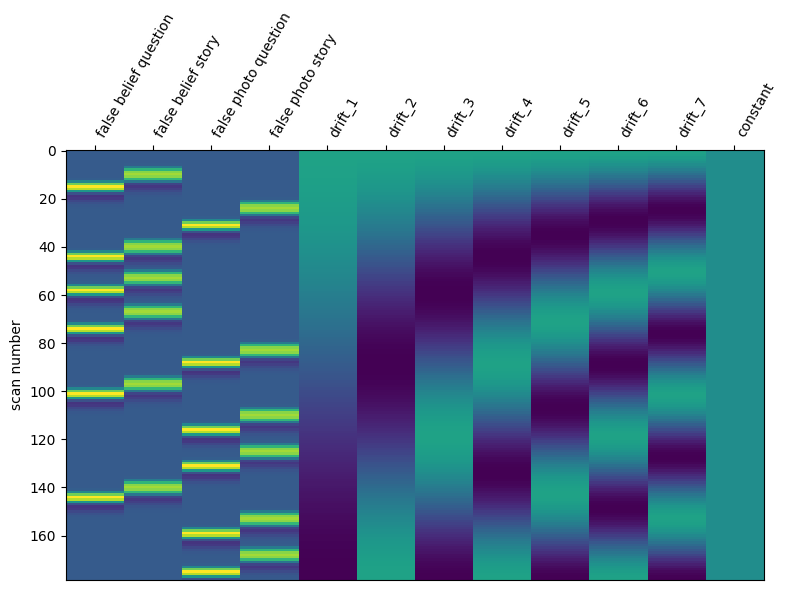

In [28]:
import numpy as np
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt

tr = 2.0  # repetition time is 2 seconds
n_scans = 179  # the acquisition comprises 179 scans
frame_times = np.arange(n_scans) * tr

conditions = df_ev1['trial_type']
duration = df_ev1['duration']
onsets = df_ev1['onset']

events = pd.DataFrame({'trial_type': conditions, 'onset': onsets, 'duration': duration})

X1 = make_first_level_design_matrix(frame_times, events)

fig, ax = plt.subplots(figsize=(8, 6))
plot_design_matrix(X1, ax=ax)

# Finding SNR

In [29]:
SNR_Image = rbd.SNR(X1,masked_data)
SNR_Image

array([2.96071512, 2.8899586 , 3.22663349, 3.19823999, 2.91657249,
       4.58319302, 3.48164891, 3.75022387, 2.68932846, 2.91409403,
       4.16812115, 3.07964486, 3.89948659, 3.42928664, 3.15250453,
       3.51522684, 2.75949646, 4.29111658, 4.80890991, 3.73342995,
       2.91734022, 5.15583068, 4.91840309, 3.08426234, 2.57535102,
       3.75412892, 3.20097205, 3.47645597, 4.62272157, 5.19285199,
       5.70528035, 2.50488188, 2.92478469, 4.9617556 , 3.76051602,
       5.07166593, 4.69646453, 5.23165802, 4.78864863, 3.48105565,
       3.00340754, 3.8792048 , 4.40024586, 5.18665523, 4.17790766,
       1.98154121, 2.53771499, 2.87889442, 4.94996503, 5.07568212,
       4.27898708, 3.36314264, 2.59334498, 4.95293485, 2.11695221,
       4.63994625, 4.90811473, 4.46003199, 5.154364  , 2.76729889,
       3.20271039, 3.93440983, 3.00602236, 3.44499563, 4.56082974,
       4.93192196, 2.51763602, 3.04042753, 2.57543977, 2.68649107,
       2.03037758, 2.40213162, 3.08216216, 3.46787261, 3.12768

In [31]:
np.load('snr.npy')

array([2.91111065, 2.89496503, 3.18526787, 3.11646095, 2.88911301,
       4.53657767, 3.52555424, 3.90052947, 2.69819876, 2.82538696])

In [1]:
import numpy as np
data = np.load('SNR.npy')
data

array([2.93557498, 2.91191535, 3.19272896, ..., 3.40254759, 3.2187289 ,
       3.05352432])

In [8]:
from nilearn.masking import unmask

data_unmasked = unmask(data, mask_img)

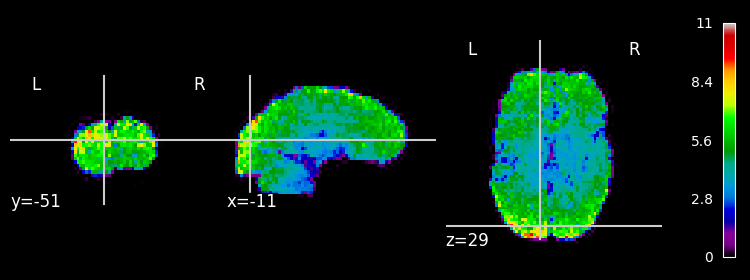

In [11]:
from nilearn.plotting import plot_epi

plot_epi(data_unmasked, colorbar=True)

(array([6.2900e+02, 1.9970e+03, 6.4240e+03, 1.4449e+04, 1.1637e+04,
        3.8970e+03, 8.6100e+02, 1.5300e+02, 2.4000e+01, 7.0000e+00]),
 array([ 0.19670655,  1.33556292,  2.47441928,  3.61327564,  4.75213201,
         5.89098837,  7.02984473,  8.16870109,  9.30755746, 10.44641382,
        11.58527018]),
 <BarContainer object of 10 artists>)

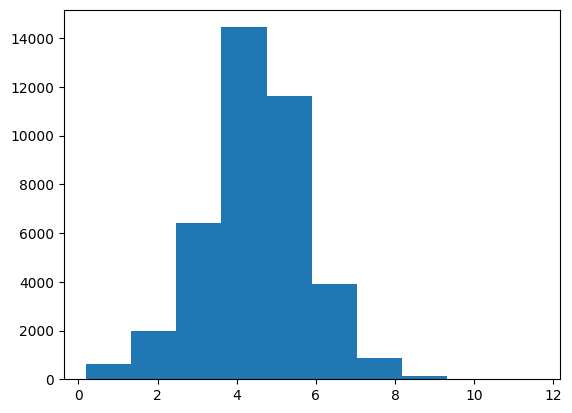

In [12]:
import matplotlib.pyplot as plt
plt.hist(data)

In [7]:
import pandas as pd
X = pd.read_csv('Data/Simulations/X.csv')
X

,st,constant
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
95,0.0,1.0
96,0.0,1.0
97,0.0,1.0
98,0.0,1.0


In [8]:
import numpy as np
y_n = np.load('Data/Simulations/y_noise.npy')
y_n.shape

(10000, 100, 1)

In [9]:
y_n[0].shape

(100, 1)

In [11]:
len(y_n)

10000

In [16]:
import bayesianModel as bM
betas = bM.betas(X.values,y_n[0])
betas[0]

array([ -0.96025305, 499.27408789])

In [28]:
e = (X@(betas[0,:])).values[np.newaxis].T-(y_n[0])

In [30]:
len(e)

100

In [1]:
import numpy as np
data = np.load('SNR_Sim.npy')
data

array([30.87461342, 27.16797282, 35.2194965 , ..., 29.36790557,
       21.27855841, 20.80402149])

(array([  97.,  844., 2389., 2994., 2122., 1053.,  374.,   92.,   28.,
           7.]),
 array([12.82501714, 16.18088923, 19.53676132, 22.89263342, 26.24850551,
        29.6043776 , 32.96024969, 36.31612178, 39.67199388, 43.02786597,
        46.38373806]),
 <BarContainer object of 10 artists>)

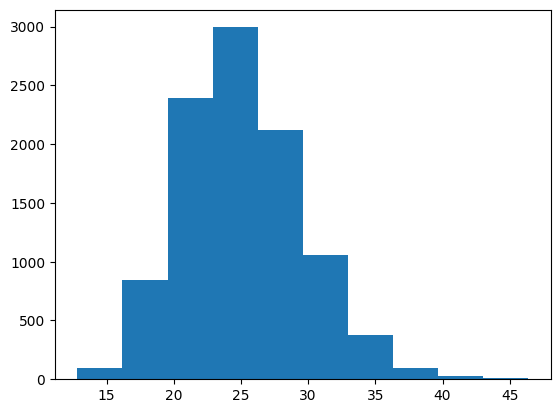

In [2]:
import matplotlib.pyplot as plt
plt.hist(data)

# Threesholding and Smoothing Testing

In [15]:
import pandas as pd

path = '../Data/'
fn_res = path + 'Simulations/stProb_P0Q0.csv'

df_res = pd.read_csv(fn_res,index_col=0)
pMap = df_res.loc[0].values
pMap

array([0.688, 0.187, 0.786, ..., 0.224, 0.887, 0.457])

In [16]:
import scipy as sp
import fMRIUtils as fmriu

import numpy as np
from scipy.optimize import fsolve

def f(bn):
    n = 40000
    return(np.abs(1/n-(np.exp(-(bn**2)/2))/(bn*(2*np.pi)**(0.5))))

Xi = pMap
## Step 1. Initialization
X = [Xi] # Initialization of X with Xi
n = len(Xi) # Number of voxels to consider
Zeta = [np.zeros(n)] # Initialize Zeta with an array of n zeros
N = [n] # Initialize N with n (all voxels inactive)
eta = [] # Initialize eta as an empty array
k = 0 # Iteration marker
t = 0 # Termination flag
S = np.arange(0.25,2.50,0.25)
while not(t) and k < 10:
    ## Step 2. MLE of X[k] *** Can change to find scale using average of st dev of image ***
    A,B,loc,scale = sp.stats.truncnorm.fit(X[k],fa=0,fb=1)

    ## Step 3. Apply gaussian smoothing to obtain X[k+1]
    s = S[k] # Value of sigma increases exponentially with iterations
    # The images are reshaped for the gaussian filter and then flattened agai.
    X.append(sp.ndimage.gaussian_filter(np.reshape(X[k], (-1, dim)),sigma=s).flatten())

    ## Step 4. Calculate threeshold
    # Get rho
    #rho = var_rho([200,200],[s,s]) # *** Change: Calculate using TRF of first row ***
    rho = 1
    # Get bn - Using values obtained in Step 2
    #bn = rho*sp.stats.truncnorm.ppf(1-1/n,A,B,loc,scale)
    # Get an - Using values obtained in Step 2
    #an = rho/(n*sp.stats.truncnorm.pdf(bn/rho,A,B,loc,scale))
    bn = fsolve(f,1)[0]
    an = 1/bn
    # Get i - Fitting image to Gumbel distribution and taking upper tail value
    locg,scaleg = sp.stats.gumbel_r.fit(X[k])
    i = sp.stats.gumbel_r.ppf(0.95,locg,scaleg)
    # Append threeshold to eta array
    A,B,loc,scale,an,bn,locg,scaleg,i,an*i+bn
    ## Step 5. Generate activation maps
    # If voxel is activated, it stays activated (logical or)
    # and if probability values are greater than threeshold,
    # voxels get activated.
    Zeta.append(np.logical_or(X[k+1]>eta[k],Zeta[k]))

    ## Step 6. Termination
    # A. If no activation detected in first iteration, terminate.
    ni = n-sum(Zeta[k+1]) # Number of inactive voxels
    if k == 0 and ni == n:
        t = 1
        print('no activation')
        return np.array(Zeta), np.array(N), np.array(eta), np.array(X)
    else:
        # If activation is detected, append the number of inactive voxels to N
        N.append(ni) 
        # B. If Jaccard Index decreases in two successive iterations, terminate.
        if k>=2:
            J_1 = fmriu.jaccardIndex(Zeta[k-2],Zeta[k-1])
            J_2 = fmriu.jaccardIndex(Zeta[k-1],Zeta[k])
            if J_1 >= J_2:
                t = 1
                print('termination by Jaccard Index')
                # Eliminate the last values of the list because the Jaccard Index descreased.
                Zeta.pop()
                N.pop()
                eta.pop()
                X.pop()
                return np.array(Zeta), np.array(N), np.array(eta), np.array(X)
        # Increase iteration marker
        k += 1
return np.array(Zeta), np.array(N), np.array(eta), np.array(X)

ModuleNotFoundError: No module named 'fMRIUtils'

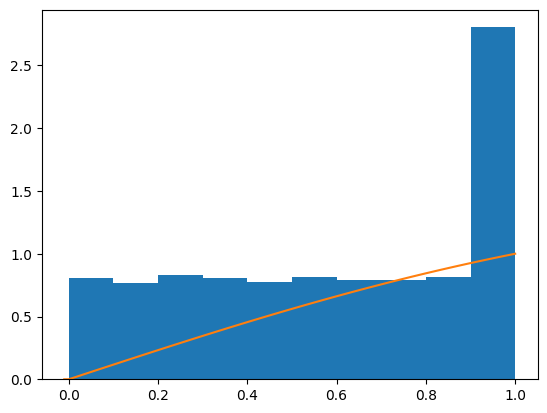

In [27]:
import matplotlib.pyplot as plt
plt.hist(pMap,density=True)
plt.plot(X,y)

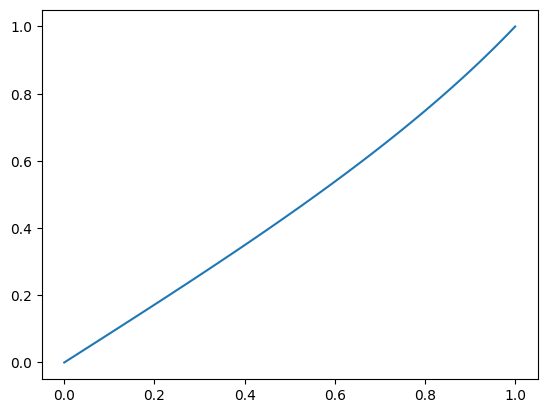

In [29]:
import numpy as np
X = np.arange(-0.01,1.01,0.01)
y = []
for x in X:
    y.append(sp.stats.truncnorm.ppf(x,A,B,loc,scale))
plt.plot(X,y)

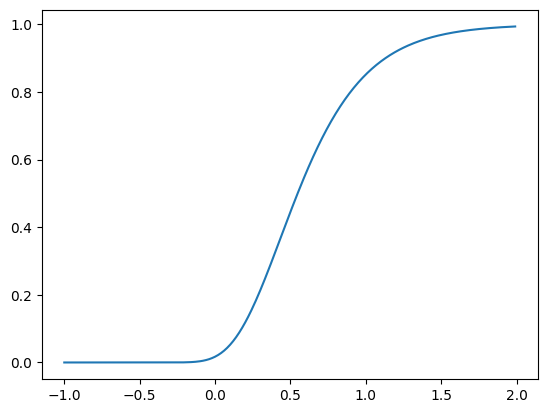

In [32]:
import numpy as np
X = np.arange(-1,2,0.01)
y = []
for x in X:
    y.append(sp.stats.gumbel_r.cdf(x,locg,scaleg))
plt.plot(X,y)

In [8]:
import scipy as sp
import numpy as np
from scipy.linalg import fractional_matrix_power
A = fractional_matrix_power(np.linalg.inv(sp.fft.fft2(np.reshape(pMap, (-1, 200)))),-0.5) # inversa a la -1/2 de esta matriz y sumar la primera fila
A

array([[154.44780539 -0.06640071j,  -3.30464353 -0.1794946j ,
         -4.09235054 +5.50581073j, ...,  -1.18994479 +3.95607259j,
         -5.27566002 -6.82554698j,  -4.80535089 +0.90577614j],
       [ -3.23869562 +1.06075774j,  16.61430198-10.39602094j,
        -10.377223  +23.18919178j, ..., -10.84059382 -8.75798372j,
         12.81414371+17.88699733j,  -3.29798089-15.59211365j],
       [ -9.080732   -2.90679076j, -14.94846722+18.86756734j,
         37.66544239 +1.55129083j, ..., -11.89946427 -0.68688913j,
         14.28161223 -2.85169638j,  15.17216013 +1.64560528j],
       ...,
       [  2.67417589 -1.26303701j,   1.43173371 +9.38976439j,
          5.95924077 +3.47860248j, ...,  18.81175234 +5.8393687j ,
          8.00798014 -3.64589063j,  -1.61149736 -7.10971925j],
       [-10.52564975 +3.298507j  ,  17.09688868-20.63236747j,
         -2.44032199 -5.56369017j, ...,  12.19405545 -2.89651483j,
         27.13317827+15.01674863j,  -4.59767162 -5.32365371j],
       [ -4.06266497 -0.1354

In [12]:
sum(A[2])

(-24.26877079565352-13.482106636911311j)

In [17]:
import numpy as np
from scipy.fftpack import fft, ifft

def gaussian_filter_1d(n, fwhm, scaled=False):
    spar = fwhm / 2.3548
    if spar < 1e-16:
        ff = np.zeros(n)
        ff[0] = 1
    else:
        ff = np.exp(-((np.arange(n // 2 + 1) / spar) ** 2) / 2)
        ff = np.concatenate((ff, ff[-2::-1]))

 

    if scaled:
        ff = ff / np.sum(ff)
    return ff

 

def gaussian_filter_2d(n, fwhm, scaled=False):
    filter_1d_n1 = gaussian_filter_1d(n[0], fwhm[0], scaled)
    filter_1d_n2 = gaussian_filter_1d(n[1], fwhm[1], scaled)
    return np.outer(filter_1d_n1, filter_1d_n2)

 

def gaussian_filter_3d(n, fwhm, scaled=False):
    filter_1d_n1 = gaussian_filter_1d(n[0], fwhm[0], scaled)
    filter_1d_n2 = gaussian_filter_1d(n[1], fwhm[1], scaled)
    filter_1d_n3 = gaussian_filter_1d(n[2], fwhm[2], scaled)
    return np.einsum('ijk->ijk', np.einsum('i,j,k', filter_1d_n1, filter_1d_n2, filter_1d_n3) * gaussian_filter_2d(n[:2], fwhm[:2], scaled))

 

def scaled_fft(z, inverse=False):
    scaling_factor = 1 / np.sqrt(np.prod(z.shape) if z.ndim > 0 else z.size)
    if inverse:
        return ifft(z) * scaling_factor
    else:
        return fft(z) / scaling_factor

 

def ffthalf_gaussian(n, fwhm, scaled=False, eps=0.01):
    if len(fwhm) == 2:
        f = gaussian_filter_2d(n, fwhm, scaled)
    else:
        if len(fwhm) == 3:
            f = gaussian_filter_3d(n, fwhm, scaled)
        else:
            raise ValueError("This currently only works for 2d or 3d")

    f_fft = scaled_fft(f)
    f_1 = np.sqrt(f_fft / np.sqrt(np.prod(n)))
    return np.real(f_1)

 

def fftminushalf_gaussian(n, fwhm, scaled=False, eps=0.01):
    f_1 = ffthalf_gaussian(n, fwhm, scaled)
    f_2 = 1 / f_1
    f_2[np.abs(f_1) < eps * np.max(np.abs(f_1))] = 0
    return f_2 / np.sqrt(np.prod(n))

 

def gaussian_minushalf(n, fwhm, scaled=False, eps=0.01):
    return np.real(scaled_fft(fftminushalf_gaussian(n, fwhm, scaled, eps), inverse=True)) / np.sqrt(np.prod(n))

 

def gaussian_half(n, fwhm, scaled=False, eps=0.01):
    return np.real(scaled_fft(ffthalf_gaussian(n, fwhm, scaled, eps), inverse=True))

 

def gauss_smooth(tstat, fwhm, scaled=True):
    n = tstat.shape
    sum_t = np.sum(tstat)
    if len(fwhm) == 2:
        f = gaussian_filter_2d(n, fwhm, scaled)
    else:
        if len(fwhm) == 3:
            f = gaussian_filter_3d(n, fwhm, scaled)
        else:
            raise ValueError("Only works for 2d or 3d")

    f_fft = fft(f, norm="ortho")
    t_fft = fft(tstat, norm="ortho")
    tf_fft = t_fft * f_fft
    tf = np.real(ifft(tf_fft, norm="ortho"))
    sum_tf = np.sum(tf)
    tf = tf * sum_t / sum_tf

 

def fwhm_llhd(fwhm, tstat, eps=1e-16):
    f1 = fftminushalf_gaussian(tstat.shape, fwhm, scaled=False, eps=eps)
    X_cor = np.real(scaled_fft(scaled_fft(tstat) * f1, inverse=True))
    return -np.sum(X_cor ** 2) / 2 + np.sum(np.log(f1[f1 > 0]))

 

def var_rho(n, fwhm, eps=1e-16):
    return np.sum(gaussian_half(n, fwhm, eps=eps))

In [19]:
var_rho([200,200],[1,1]) # tiene que ser 1.1

0.01823344445273334

In [14]:
import numpy as np
from scipy.optimize import fsolve

def f(bn):
    n = 40000
    return(np.abs(1/n-(np.exp(-(bn**2)/2))/(bn*(2*np.pi)**(0.5))))
    
bn = fsolve(f,1)[0]
an = 1/bn